In [130]:
#import packages
from time import time
import datetime

import pandas as pd
import numpy as np
import quandl

#to plot within notebook
import matplotlib.pyplot as plt
%matplotlib inline

#setting figure size
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 20,10

#importing required libraries
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import MinMaxScaler, Imputer
from sklearn.impute import SimpleImputer
from keras.models import Sequential
from keras.layers import Dense, Dropout, LSTM
from keras.callbacks import TensorBoard
from fastai.structured import add_datepart

#to get stock OHCL data
from stocker import Stocker

quandl.ApiConfig.api_key = '<YOUR-API-KEY>'

In [131]:
from numpy.random import seed
seed(1)
from tensorflow import set_random_seed
set_random_seed(2)

### Verify Keras is using GPU

In [132]:
from keras import backend as K
K.tensorflow_backend._get_available_gpus()

['/job:localhost/replica:0/task:0/device:GPU:0']

In [133]:
sp500 = ['MMM', 'ABT', 'ABBV', 'ABMD', 'ACN', 'ATVI', 'ADBE', 'AMD', 'AAP', 'AES', 'AMG', 'AFL', 'A', 'APD', 'AKAM', 'ALK', 'ALB', 'ARE', 'ALXN', 'ALGN', 'ALLE', 'AGN', 'ADS', 'LNT', 'ALL', 'GOOGL', 'GOOG', 'MO', 'AMZN', 'AEE', 'AAL', 'AEP', 'AXP', 'AIG', 'AMT', 'AWK', 'AMP', 'ABC', 'AME', 'AMGN', 'APH', 'APC', 'ADI', 'ANSS', 'ANTM', 'AON', 'AOS', 'APA', 'AIV', 'AAPL', 'AMAT', 'APTV', 'ADM', 'ARNC', 'ANET', 'AJG', 'AIZ', 'ATO', 'T', 'ADSK', 'ADP', 'AZO', 'AVB', 'AVY', 'BHGE', 'BLL', 'BAC', 'BK', 'BAX', 'BBT', 'BDX', 'BRK.B', 'BBY', 'BIIB', 'BLK', 'HRB', 'BA', 'BKNG', 'BWA', 'BXP', 'BSX', 'BHF', 'BMY', 'AVGO', 'BR', 'BF.B', 'CHRW', 'COG', 'CDNS', 'CPB', 'COF', 'CPRI', 'CAH', 'KMX', 'CCL', 'CAT', 'CBOE', 'CBRE', 'CBS', 'CE', 'CELG', 'CNC', 'CNP', 'CTL', 'CERN', 'CF', 'SCHW', 'CHTR', 'CVX', 'CMG', 'CB', 'CHD', 'CI', 'XEC', 'CINF', 'CTAS', 'CSCO', 'C', 'CFG', 'CTXS', 'CLX', 'CME', 'CMS', 'KO', 'CTSH', 'CL', 'CMCSA', 'CMA', 'CAG', 'CXO', 'COP', 'ED', 'STZ', 'COO', 'CPRT', 'GLW', 'COST', 'COTY', 'CCI', 'CSX', 'CMI', 'CVS', 'DHI', 'DHR', 'DRI', 'DVA', 'DE', 'DAL', 'XRAY', 'DVN', 'FANG', 'DLR', 'DFS', 'DISCA', 'DISCK', 'DISH', 'DG', 'DLTR', 'D', 'DOV', 'DWDP', 'DTE', 'DRE', 'DUK', 'DXC', 'ETFC', 'EMN', 'ETN', 'EBAY', 'ECL', 'EIX', 'EW', 'EA', 'EMR', 'ETR', 'EOG', 'EFX', 'EQIX', 'EQR', 'ESS', 'EL', 'EVRG', 'ES', 'RE', 'EXC', 'EXPE', 'EXPD', 'EXR', 'XOM', 'FFIV', 'FB', 'FAST', 'FRT', 'FDX', 'FIS', 'FITB', 'FE', 'FRC', 'FISV', 'FLT', 'FLIR', 'FLS', 'FLR', 'FMC', 'FL', 'F', 'FTNT', 'FTV', 'FBHS', 'BEN', 'FCX', 'GPS', 'GRMN', 'IT', 'GD', 'GE', 'GIS', 'GM', 'GPC', 'GILD', 'GPN', 'GS', 'GWW', 'HAL', 'HBI', 'HOG', 'HRS', 'HIG', 'HAS', 'HCA', 'HCP', 'HP', 'HSIC', 'HSY', 'HES', 'HPE', 'HLT', 'HFC', 'HOLX', 'HD', 'HON', 'HRL', 'HST', 'HPQ', 'HUM', 'HBAN', 'HII', 'IDXX', 'INFO', 'ITW', 'ILMN', 'IR', 'INTC', 'ICE', 'IBM', 'INCY', 'IP', 'IPG', 'IFF', 'INTU', 'ISRG', 'IVZ', 'IPGP', 'IQV', 'IRM', 'JKHY', 'JEC', 'JBHT', 'JEF', 'SJM', 'JNJ', 'JCI', 'JPM', 'JNPR', 'KSU', 'K', 'KEY', 'KEYS', 'KMB', 'KIM', 'KMI', 'KLAC', 'KSS', 'KHC', 'KR', 'LB', 'LLL', 'LH', 'LRCX', 'LW', 'LEG', 'LEN', 'LLY', 'LNC', 'LIN', 'LKQ', 'LMT', 'L', 'LOW', 'LYB', 'MTB', 'MAC', 'M', 'MRO', 'MPC', 'MAR', 'MMC', 'MLM', 'MAS', 'MA', 'MAT', 'MKC', 'MXIM', 'MCD', 'MCK', 'MDT', 'MRK', 'MET', 'MTD', 'MGM', 'MCHP', 'MU', 'MSFT', 'MAA', 'MHK', 'TAP', 'MDLZ', 'MNST', 'MCO', 'MS', 'MOS', 'MSI', 'MSCI', 'MYL', 'NDAQ', 'NOV', 'NKTR', 'NTAP', 'NFLX', 'NWL', 'NEM', 'NWSA', 'NWS', 'NEE', 'NLSN', 'NKE', 'NI', 'NBL', 'JWN', 'NSC', 'NTRS', 'NOC', 'NCLH', 'NRG', 'NUE', 'NVDA', 'ORLY', 'OXY', 'OMC', 'OKE', 'ORCL', 'PCAR', 'PKG', 'PH', 'PAYX', 'PYPL', 'PNR', 'PBCT', 'PEP', 'PKI', 'PRGO', 'PFE', 'PM', 'PSX', 'PNW', 'PXD', 'PNC', 'RL', 'PPG', 'PPL', 'PFG', 'PG', 'PGR', 'PLD', 'PRU', 'PEG', 'PSA', 'PHM', 'PVH', 'QRVO', 'PWR', 'QCOM', 'DGX', 'RJF', 'RTN', 'O', 'RHT', 'REG', 'REGN', 'RF', 'RSG', 'RMD', 'RHI', 'ROK', 'ROL', 'ROP', 'ROST', 'RCL', 'CRM', 'SBAC', 'SLB', 'STX', 'SEE', 'SRE', 'SHW', 'SPG', 'SWKS', 'SLG', 'SNA', 'SO', 'LUV', 'SPGI', 'SWK', 'SBUX', 'STT', 'SYK', 'STI', 'SIVB', 'SYMC', 'SYF', 'SNPS', 'SYY', 'TROW', 'TTWO', 'TPR', 'TGT', 'TEL', 'FTI', 'TFX', 'TXN', 'TXT', 'TMO', 'TIF', 'TWTR', 'TJX', 'TMK', 'TSS', 'TSCO', 'TDG', 'TRV', 'TRIP', 'FOXA', 'FOX', 'TSN', 'UDR', 'ULTA', 'USB', 'UAA', 'UA', 'UNP', 'UAL', 'UNH', 'UPS', 'URI', 'UTX', 'UHS', 'UNM', 'VFC', 'VLO', 'VAR', 'VTR', 'VRSN', 'VRSK', 'VZ', 'VRTX', 'VIAB', 'V', 'VNO', 'VMC', 'WAB', 'WMT', 'WBA', 'DIS', 'WM', 'WAT', 'WEC', 'WCG', 'WFC', 'WELL', 'WDC', 'WU', 'WRK', 'WY', 'WHR', 'WMB', 'WLTW', 'WYNN', 'XEL', 'XRX', 'XLNX', 'XYL', 'YUM', 'ZBH', 'ZION', 'ZTS']
best100 = ['msci', 'aig', 'cf', 'dte', 'gww', 're', 'apa', 'ual', 'ndaq', 'amp', 'pru', 'pcar', 'csx', 'dre', 'sna', 'rtn', 'ma', 'usb', 'o', 'hon', 'antm', 'wat', 'tfx', 'akam', 'sti', 'mnst', 'ads', 'dva', 'pep', 'wynn', 'mdlz', 'regn', 'incy', 'pnr', 'etr', 'tss', 'duk', 'mtb', 'ksu', 'fcx', 'aee', 'wfc', 'flir', 'sbac', 'vno', 'mat', 'zion', 'nwl', 'gd', 'amgn', 'mac', 'oxy', 'ed', 'sre', 'blk', 'pld', 'lmt', 'xel', 'gild', 'ctl', 'vlo', 'aes', 'aos', 'arnc', 'eqix', 'cof', 'k', 'es', 'dhr', 'hsy', 'pgr', 'irm', 'udr', 'amzn', 'bk', 'mmc', 'hcp', 'ppl', 'tgt', 'fmc', 'stt', 'ba', 'mcd', 'cme', 'ivz', 'axp', 'intc', 'xom', 'idxx', 'ess', 'amg', 'afl', 'ups', 'mo', 'omc', 'hum', 'swk', 'unm', 'cern', 'ce', 'unp']

In [134]:
# 10 years data
period = 365 * 10
# period of 10 years from 12-31-2017 backwards go back to 01-04-2008
date_range = ('01-01-2008', '12-31-2017')
max_stocker = '03-27-2018'
min_date = datetime.datetime.strptime(date_range[0], "%m-%d-%Y")
max_date = datetime.datetime.strptime(max_stocker, "%m-%d-%Y")

In [135]:
# tickers = best100[:50]
tickers = ['gww']
tickerobjs = {} 
for ticker in tickers:
    tickerobjs[ticker] = (Stocker(ticker=ticker))

GWW Stocker Initialized. Data covers 1984-12-17 to 2018-03-27.


In [136]:
for i, (k, v) in enumerate(tickerobjs.items()): 
    print(i, k, v)

0 gww <stocker.Stocker object at 0x7f36b08cf0b8>


### Get sentiments

In [137]:
tickers_ciks = pd.read_csv('AllSecTickers.csv')
filing_sentiments = {}
for ticker in tickers:
    cik = int(tickers_ciks.loc[tickers_ciks['ticker'] == ticker]['cik'])
    fname = str(cik).zfill(10) + '.csv'
    
    tenQs = pd.read_csv(
        'sentiment-scores/10-Q/{}'.format(fname),
        names=['Cik','Coname','Date','Form','Secname','Neg_Score','Neu_Score','Pos_Score']
    )

    tenKs = pd.read_csv(
        'sentiment-scores/10-K/{}'.format(fname),
        names=['Cik','Coname','Date','Form','Secname','Neg_Score','Neu_Score','Pos_Score']
    )
    
    sentiments = pd.concat([tenQs, tenKs], ignore_index=True)
    sentiments['Date'] = pd.to_datetime(sentiments.Date, format='%Y-%m-%d')
    sentiments.index = sentiments['Date']
    sentiments = sentiments.sort_index(ascending=True, axis=0)
    
    filing_sentiments[ticker] = sentiments

### Only keep stocks within the specified date range

In [138]:
finals = {}
for i, (k, v) in enumerate(tickerobjs.items()):
    try:
        if v.min_date.date() < min_date.date() and v.max_date.date() <= max_date.date():
            finals[k] = v
    except AttributeError:
        pass
print(len(finals))
tickerobjs = finals

1


### Date features

In [139]:
stocks_data = {}

for i, (ticker, stocker) in enumerate(tickerobjs.items()):
    df = stocker.make_df(date_range[0], date_range[1])
    # ddd date features
    add_datepart(df, 'Date', drop=False)
    # drop unwanted columns date feature columns
    df = df.drop(['Is_quarter_end', 'Is_quarter_start', 'Is_year_end', 'Is_year_start', 'Elapsed'], axis=1)
    df['Is_month_end'] = df['Is_month_end'].astype(int)
    df['Is_month_start'] = df['Is_month_start'].astype(int)
    # setting index as date
    df['Date'] = pd.to_datetime(df.Date,format='%Y-%m-%d')
    df.index = df['Date']
    # sort df by date
    df = df.sort_index(ascending=True, axis=0)
    
    stocks_data[ticker] = df

/home/rafay/equity-portfolio-prediction/stocker.py:172: FutureWarning: Comparing Series of datetimes with 'datetime.date'.  Currently, the
'datetime.date' is coerced to a datetime. In the future pandas will
not coerce, and a TypeError will be raised. To retain the current
behavior, convert the 'datetime.date' to a datetime with
'pd.Timestamp'.
  trim_df = df[(df['Date'] >= start_date.date()) &
/home/rafay/equity-portfolio-prediction/stocker.py:173: FutureWarning: Comparing Series of datetimes with 'datetime.date'.  Currently, the
'datetime.date' is coerced to a datetime. In the future pandas will
not coerce, and a TypeError will be raised. To retain the current
behavior, convert the 'datetime.date' to a datetime with
'pd.Timestamp'.
  (df['Date'] <= end_date.date())]


### Fix length issue

In [140]:
date_list = pd.date_range(start=date_range[0], end=date_range[1], freq='B')
date_df = pd.DataFrame(date_list).rename(columns={0: 'Date'})
date_df.index = date_df['Date']
date_df.rename(columns={'Date': 'Date2'}, inplace=True)

for i, (ticker, df) in enumerate(stocks_data.items()):
    stocks_data[ticker] = pd.concat([df, date_df], ignore_index=False, axis=1)

### Combine sentiments data with DFs

In [141]:
for i, (ticker, df) in enumerate(stocks_data.items()):
    sentiment_df = filing_sentiments[ticker]
    forward_merged = pd.merge_asof(df, sentiment_df, left_index=True, right_index=True, direction='backward')
    stocks_data[ticker] = forward_merged

### Print train, val and test count

In [142]:
TRAIN_SPLIT = 0.8  # 80% of total dataset
VAL_TEST_SPLIT = 0.5  # 50% of the remaining dataset

total_count = len(stocks_data[list(stocks_data.keys())[0]])
train_count = int(total_count * TRAIN_SPLIT)
left = total_count - train_count
valid_count = int(left * VAL_TEST_SPLIT)
test_count = int(left - valid_count)

print(sum([train_count, valid_count, test_count]))
total_count, train_count, valid_count, test_count

2609


(2609, 2087, 261, 261)

### Create new dataset with required columns

In [143]:
pick_columns = {
    'Adj. Open', 'Adj. High', 'Adj. Low', 'Adj. Close', 'Adj. Volume', 'Month', 'Week', 'Day', 'Dayofweek', 
    'Dayofyear', 'Is_month_end', 'Is_month_start', 'Neg_Score'
}
y_column = {'Adj. Close'}
x_columns = pick_columns - y_column

for i, (ticker, df) in enumerate(stocks_data.items()):
    # creating new dataframe

    new_data = pd.DataFrame(df, columns=pick_columns).interpolate(limit_direction='both')
        
    x_df = pd.DataFrame(new_data, columns=x_columns)
    y_df = pd.DataFrame(new_data, columns=y_column)
    stocks_data[ticker] = {
        'x': x_df, 'y': y_df,
        'x_train': x_df[0:train_count], 'y_train': y_df[0:train_count],
        'x_valid': x_df[train_count:train_count+valid_count], 'y_valid': y_df[train_count:train_count+valid_count],
        'x_test': x_df[train_count+valid_count:], 'y_test': y_df[train_count+valid_count:],
        'new_data': new_data
    }

### Verify just one

In [144]:
forward_merged = stocks_data['gww']['x']
forward_merged[forward_merged.index >= '2008-04-09'].head()

,Adj. Low,Week,Day,Adj. High,Neg_Score,Adj. Volume,Month,Adj. Open,Dayofyear,Is_month_start,Is_month_end,Dayofweek
Date,,,,,,,,,,,,
2008-04-09,67.492215,15.0,9.0,69.539713,0.03925,1134600.0,4.0,69.472856,100.0,0.0,0.0,2.0
2008-04-10,66.213573,15.0,10.0,67.683593,0.03925,1302000.0,4.0,67.534000,101.0,0.0,0.0,3.0
2008-04-11,65.603503,15.0,11.0,67.592500,0.03925,2078400.0,4.0,65.879288,102.0,0.0,0.0,4.0
2008-04-14,67.985286,16.0,14.0,70.400497,0.03925,1987100.0,4.0,69.548070,105.0,0.0,0.0,0.0
2008-04-15,68.244357,16.0,15.0,69.364213,0.03925,1704100.0,4.0,68.979785,106.0,0.0,0.0,1.0


In [145]:
from numpy import hstack
from keras.preprocessing.sequence import TimeseriesGenerator

for i, (ticker, ds) in enumerate(stocks_data.items()):
    x_series = []
    y_series = []
    x_train_series = []
    y_train_series = []
    x_valid_series = []
    y_valid_series = []
    x_test_series = []
    y_test_series = []
    
    ds['x_values'] = ds['x'].values
    ds['y_values'] = ds['y'].values
    
    ds['x_train_values'] = ds['x_train'].values
    ds['y_train_values'] = ds['y_train'].values
    
    ds['x_valid_values'] = ds['x_valid'].values
    ds['y_valid_values'] = ds['y_valid'].values
    
    ds['x_test_values'] = ds['x_test'].values
    ds['y_test_values'] = ds['y_test'].values
    
    # Append values
    x_series.append(ds['x_values'])
    y_series.append(ds['y_values'])
    
    x_train_series.append(ds['x_train_values'])
    y_train_series.append(ds['y_train_values'])
    
    x_valid_series.append(ds['x_valid_values'])
    y_valid_series.append(ds['y_valid_values'])
    
    x_test_series.append(ds['x_test_values'])
    y_test_series.append(ds['y_test_values'])
    

    x_dataset = hstack(tuple(x_series))
    y_dataset = hstack(tuple(y_series))

    x_train_dataset = hstack(tuple(x_train_series))
    y_train_dataset = hstack(tuple(y_train_series))

    x_valid_dataset = hstack(tuple(x_valid_series))
    y_valid_dataset = hstack(tuple(y_valid_series))

    x_test_dataset = hstack(tuple(x_test_series))
    y_test_dataset = hstack(tuple(y_test_series))

    # fit scalers on full series
    x_scaler = MinMaxScaler(feature_range=(0, 1))
    y_scaler = MinMaxScaler(feature_range=(0, 1))

    x_dataset = x_scaler.fit_transform(x_dataset)
    y_dataset = y_scaler.fit_transform(y_dataset)
    
    # Scale train and validation datasets
    x_train_dataset = x_scaler.transform(x_train_dataset)
    y_train_dataset = y_scaler.transform(y_train_dataset)

    x_valid_dataset = x_scaler.transform(x_valid_dataset)
    y_valid_dataset = y_scaler.transform(y_valid_dataset)

    x_test_dataset = x_scaler.transform(x_test_dataset)
    y_test_dataset = y_scaler.transform(y_test_dataset)
    
    ds['x_train_dataset'] = x_train_dataset
    ds['y_train_dataset'] = y_train_dataset
    
    ds['x_valid_dataset'] = x_valid_dataset
    ds['y_valid_dataset'] = y_valid_dataset
    
    ds['x_test_dataset'] = x_test_dataset
    ds['y_test_dataset'] = y_test_dataset
    
    # Store feature scalers
    ds['x_scaler'] = x_scaler
    ds['y_scaler'] = y_scaler
    
    print('*' * 5 + 'Train shapes for ' + ticker)
    print(x_train_dataset.shape, y_train_dataset.shape) 
    
    print('*' * 5 + 'Validation shapes for ' + ticker)
    print(x_valid_dataset.shape, y_valid_dataset.shape) 
    
    print('*' * 5 + 'Test shapes for ' + ticker)
    print(x_test_dataset.shape, y_test_dataset.shape) 

*****Train shapes for gww
(2087, 12) (2087, 1)
*****Validation shapes for gww
(261, 12) (261, 1)
*****Test shapes for gww
(261, 12) (261, 1)


### Create a TimeseriesGenerator

In [146]:
window_length = 90
BATCH_SIZE = int(window_length / 5)

for i, (ticker, ds) in enumerate(stocks_data.items()):
    x_train_dataset = ds['x_train_dataset']
    y_train_dataset = ds['y_train_dataset']
    
    x_valid_dataset = ds['x_valid_dataset']
    y_valid_dataset = ds['y_valid_dataset']
    
    x_test_dataset = ds['x_test_dataset']
    y_test_dataset = ds['y_test_dataset']
    
    train_generator = TimeseriesGenerator(x_train_dataset, y_train_dataset, length=window_length, batch_size=BATCH_SIZE)
    print('Train samples for {}: {}'.format(ticker, len(train_generator)))

    valid_generator = TimeseriesGenerator(x_valid_dataset, y_valid_dataset, length=window_length, batch_size=BATCH_SIZE)
    print('Validation samples for {}: {}'.format(ticker, len(valid_generator)))

    test_generator = TimeseriesGenerator(x_test_dataset, y_test_dataset, length=window_length, batch_size=BATCH_SIZE)
    print('Test samples for {}: {}'.format(ticker, len(test_generator)))
    
    ds['train_generator'] = train_generator
    ds['valid_generator'] = valid_generator
    ds['test_generator'] = test_generator
    

Train samples for gww: 111
Validation samples for gww: 10
Test samples for gww: 10


In [147]:
MODELS_PATH = 'modelsgwwneg'
PLOTS_PATH = 'plotsgwwneg'

### Fit LSTM Model

*****Training for gww
Epoch 1/20
111/111 [==============================] - 25s 229ms/step - loss: 0.0153 - val_loss: 0.0099
Epoch 2/20
111/111 [==============================] - 25s 225ms/step - loss: 0.0174 - val_loss: 0.0083
Epoch 3/20
111/111 [==============================] - 25s 221ms/step - loss: 0.0213 - val_loss: 0.0026
Epoch 4/20
111/111 [==============================] - 24s 213ms/step - loss: 0.0268 - val_loss: 0.0019
Epoch 5/20
111/111 [==============================] - 24s 212ms/step - loss: 0.0247 - val_loss: 0.0032
Epoch 6/20
111/111 [==============================] - 25s 221ms/step - loss: 0.0207 - val_loss: 0.0018
Epoch 7/20
111/111 [==============================] - 24s 217ms/step - loss: 0.0146 - val_loss: 0.0024
Epoch 8/20
111/111 [==============================] - 24s 212ms/step - loss: 0.0090 - val_loss: 0.0012
Epoch 9/20
111/111 [==============================] - 24s 216ms/step - loss: 0.0054 - val_loss: 0.0010
Epoch 10/20
111/111 [==============================

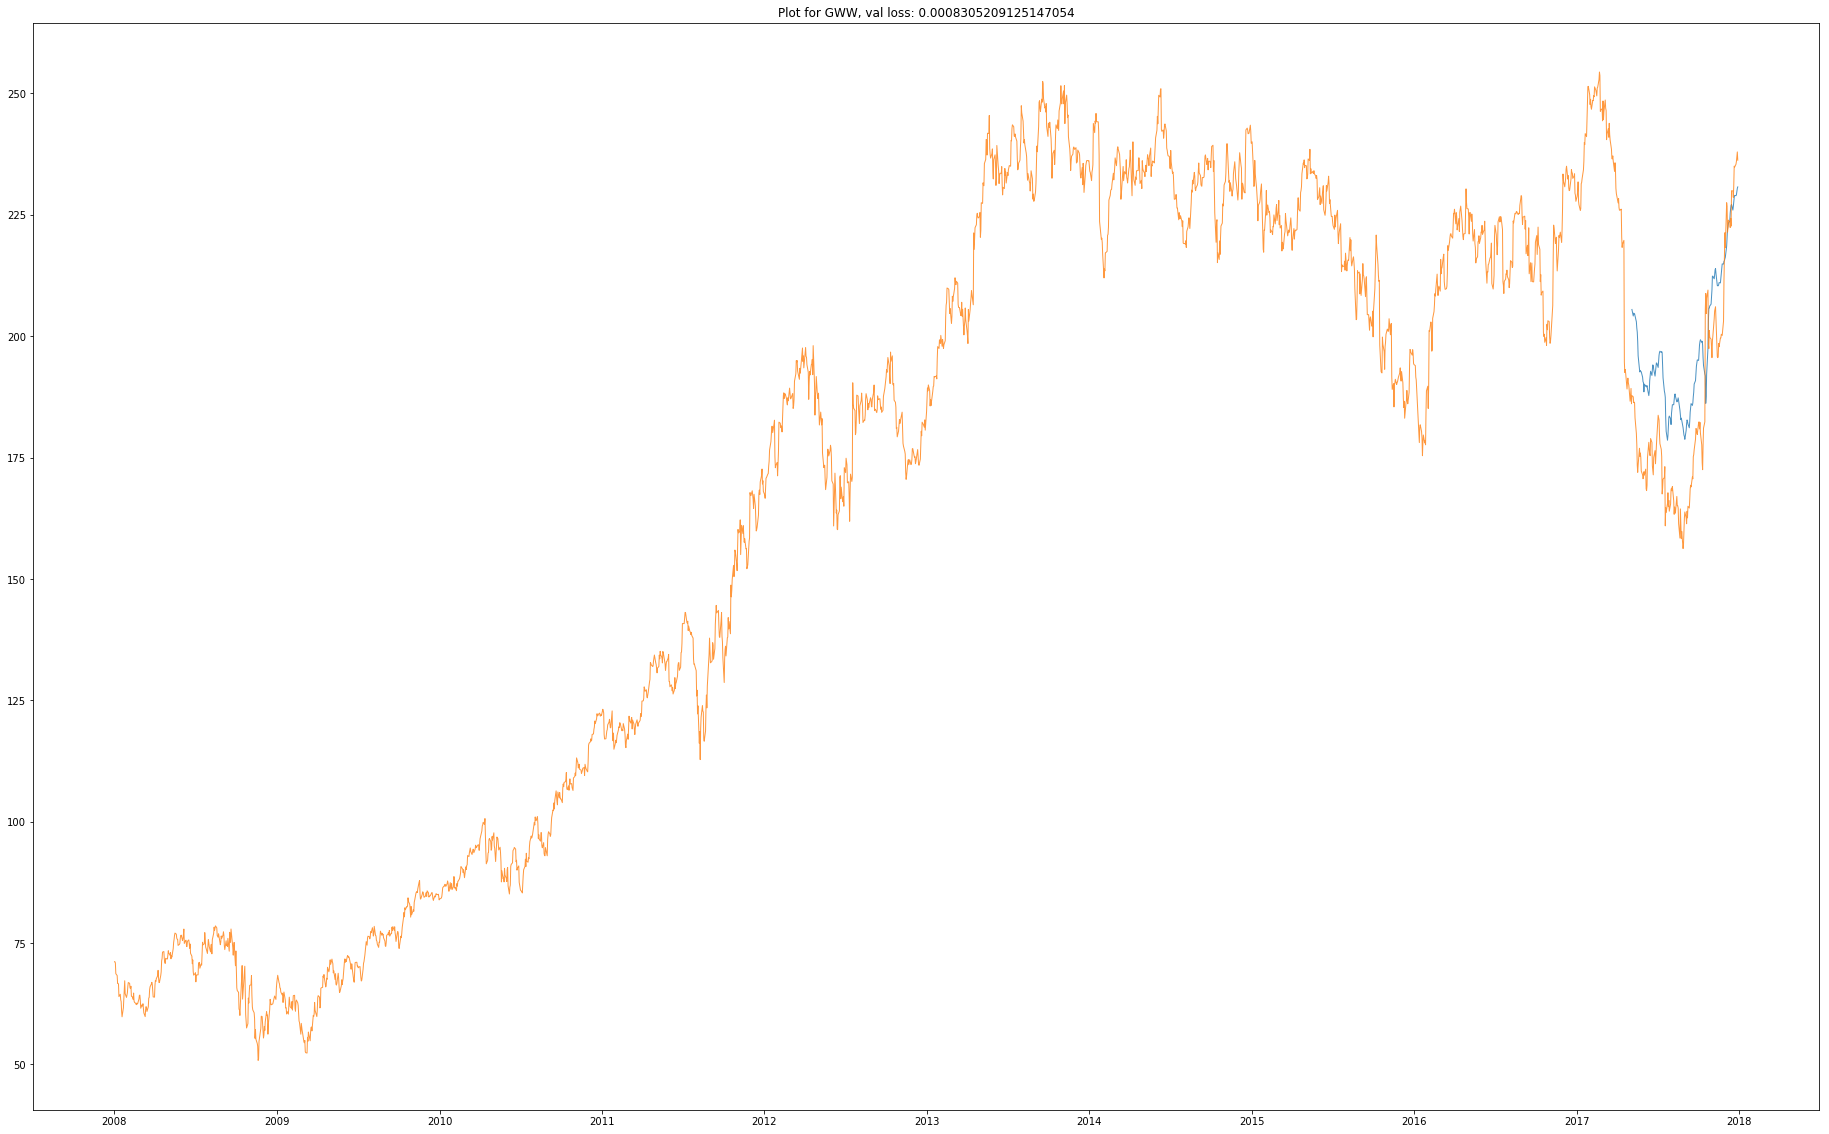

In [148]:
EPOCHS = 20

for i, (ticker, ds) in enumerate(stocks_data.items()):
    train_generator = ds['train_generator']
    valid_generator = ds['valid_generator']
    test_generator = ds['test_generator']
    
    OUTPUT_SIZE = 1
    
    model = Sequential()
    model.add(LSTM(units=50, return_sequences=True, input_shape=(window_length, OUTPUT_SIZE * len(x_columns))))
    model.add(Dropout(0.2))
    model.add(LSTM(units=50))
    model.add(Dropout(0.2))
    model.add(Dense(OUTPUT_SIZE))

    model.compile(loss='mean_squared_error', optimizer='adam')

    # Tensorboard
    tensorboard = TensorBoard(log_dir='logs/{}-{}'.format(ticker, time()))
    
    # Checkpoint
    filepath='{}/{}.weights.best.hdf5'.format(MODELS_PATH, ticker)
#     checkpoint = ModelCheckpoint(filepath, monitor='val_loss', verbose=1, save_best_only=True, mode='min')
    callbacks_list = [tensorboard]
    
    print('*' * 5 + 'Training for {}'.format(ticker))
    model.fit_generator(
        train_generator, 
        validation_data=valid_generator, 
        shuffle=False,
        epochs=EPOCHS, 
        verbose=1, 
        callbacks=callbacks_list
    )
    model.save(filepath)
    
    # --Plots while training
    val_loss = model.evaluate_generator(valid_generator)
    print('Val loss for {}: {}'.format(ticker, val_loss))
    
    # Make test predictions
    test_predict = model.predict_generator(test_generator)
    predicted_df = pd.DataFrame(y_scaler.inverse_transform(test_predict))
    predicted_df = predicted_df.rename(columns={0: ticker})
    
    original_test = stocks_data[ticker]['y_test'].iloc[window_length:]
    predicted_df.index = original_test.index
    
    predicted_ticker = pd.concat([predicted_df[ticker], original_test], axis=1)
    
    %matplotlib inline
    plt.figure(figsize=(32, 20))

    plt.plot(predicted_ticker[ticker], linewidth=1, alpha=0.8)
    plt.plot(stocks_data[ticker]['y'], linewidth=1, alpha=0.8)
    plt.title('Plot for {}, val loss: {}'.format(ticker.upper(), val_loss))
    plt.savefig('{}/{}'.format(PLOTS_PATH, ticker))
#     plt.show()

### Calculate RMSE for no sentiments

In [156]:
# predicted_ticker_nosen = predicted_ticker.copy()
predicted_ticker_nosen['MSE'] = (predicted_ticker_nosen['gww'] - predicted_ticker_nosen['Adj. Close']) ** 2
predicted_ticker_nosen['RMSE'] = predicted_ticker_nosen['MSE'].mean() ** 0.5
rmse = predicted_ticker_nosen['RMSE'][0]
rmse

19.151984337164745

### Calculate RMSE for pos sentiments

In [1]:
# predicted_ticker_pos = predicted_ticker.copy()
predicted_ticker_pos['MSE'] = (predicted_ticker_pos['gww'] - predicted_ticker_pos['Adj. Close']) ** 2
predicted_ticker_pos['RMSE'] = predicted_ticker_pos['MSE'].mean() ** 0.5
rmse = predicted_ticker_pos['RMSE'][0]
rmse

18.75355680707536


### Calculate RMSE for neg sentiments

In [157]:
# predicted_ticker_neg = predicted_ticker.copy()
predicted_ticker_neg['MSE'] = (predicted_ticker_neg['gww'] - predicted_ticker_neg['Adj. Close']) ** 2
predicted_ticker_neg['RMSE'] = predicted_ticker_neg['MSE'].mean() ** 0.5
rmse = predicted_ticker_neg['RMSE'][0]
rmse

16.468169339910794

### Plots for no sentiments and negative sentiments

Text(0.5, 1.0, 'Plots for GWW')

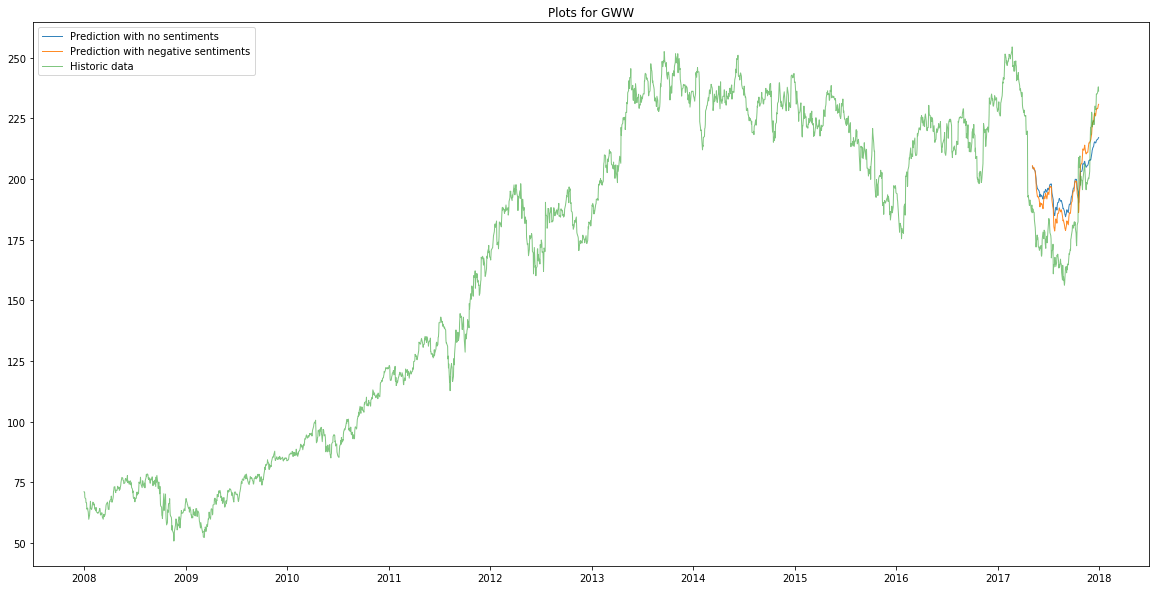

In [191]:
%matplotlib inline
plt.figure(figsize=(20, 10))

plt.plot(predicted_ticker_nosen[ticker], linewidth=1, alpha=0.9)
plt.plot(predicted_ticker_neg[ticker], linewidth=1, alpha=0.9)
plt.plot(stocks_data[ticker]['y'], linewidth=1, alpha=0.6)
plt.legend(['Prediction with no sentiments', 'Prediction with negative sentiments', 'Historic data'])
plt.title('Plots for {}'.format(ticker.upper()))

### Zoomed in plots

Text(0.5, 1.0, 'Plots for GWW')

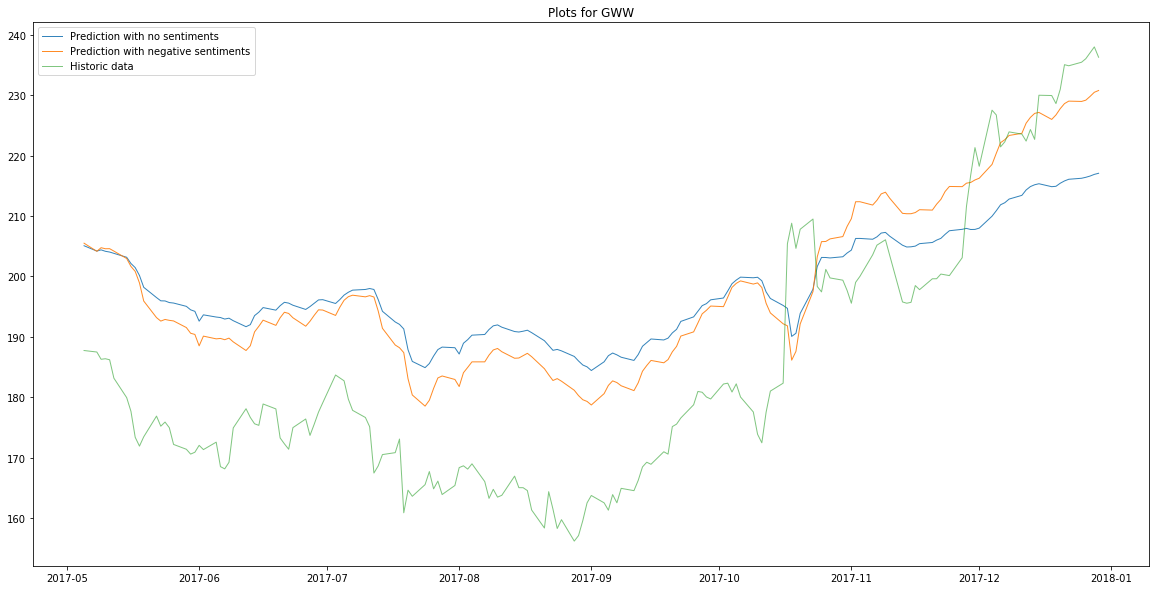

In [203]:
%matplotlib inline
plt.figure(figsize=(20, 10))

filtered = stocks_data[ticker]['y'][stocks_data[ticker]['y'].index >= predicted_ticker_nosen.index[0]]

plt.plot(predicted_ticker_nosen[ticker], linewidth=1, alpha=0.9)
plt.plot(predicted_ticker_neg[ticker], linewidth=1, alpha=0.9)
plt.plot(filtered, linewidth=1, alpha=0.6)
plt.legend(['Prediction with no sentiments', 'Prediction with negative sentiments', 'Historic data'])
plt.title('Plots for {}'.format(ticker.upper()))